# Support Vector Regression for Time Series Problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.externals import joblib
import pandas as pd

#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
#df = pd.read_csv('DFI-final_df_no_duplication.csv',delimiter='|',parse_dates=['TimeSeries_Date'], index_col='Month',date_parser=dateparse)

df = pd.read_csv('DFI-final_df_no_duplication.csv',delimiter='|')
df.dtypes

Unnamed: 0                         int64
Unnamed: 0.1                       int64
img                               object
product_Type                      object
All_Text                          object
TimeSeries_price                 float64
TimeSeries_Date                    int64
TimeSeries_price_log             float64
TimeSeries_price_MinMaxScaler    float64
TimeSeries_price_Standardized    float64
dtype: object

In [3]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        #print(a)
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
        #print(dataY)
    return np.array(dataX), np.array(dataY)

In [18]:
from sklearn.svm import SVR
                        
        
def support_vector_regression(train,test, look_back, verbose, show_plt):
    
    # reshape into X=t and Y=t+1
    trainX, trainY = create_dataset(train, look_back)
    testX, testY = create_dataset(test, look_back)
    sv_regressor = SVR(kernel='linear',max_iter=5000)
    sv_regressor.fit(trainX,trainY)

    # saving the model
    filename = 'sv_regressor_model.sav'
    joblib.dump(sv_regressor, filename)
    # make predictions
    trainPredict = sv_regressor.predict(trainX)
    testPredict = sv_regressor.predict(testX)
    
    
    trainPredict = trainPredict.reshape(-1,1)
    testPredict = testPredict.reshape(-1,1)
    #print("shape of trainpredict ", trainPredict.shape)
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
    print('SVR Train Score: %.2f RMSE' % (trainScore))
    testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
    print('SVR Test Score: %.2f RMSE' % (testScore))

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

    # plot baseline and predictions
    
    
    if show_plt:
        plt.figure(figsize=(12,12))
        plt.plot(scaler.inverse_transform(dataset))
        plt.xlabel('Time Point')
        plt.ylabel("Price")
        plt.plot(trainPredictPlot)
        plt.plot(testPredictPlot)
        plt.show()
        print('\n')

generalforsale
SVR Train Score: 20.35 RMSE
SVR Test Score: 29.83 RMSE


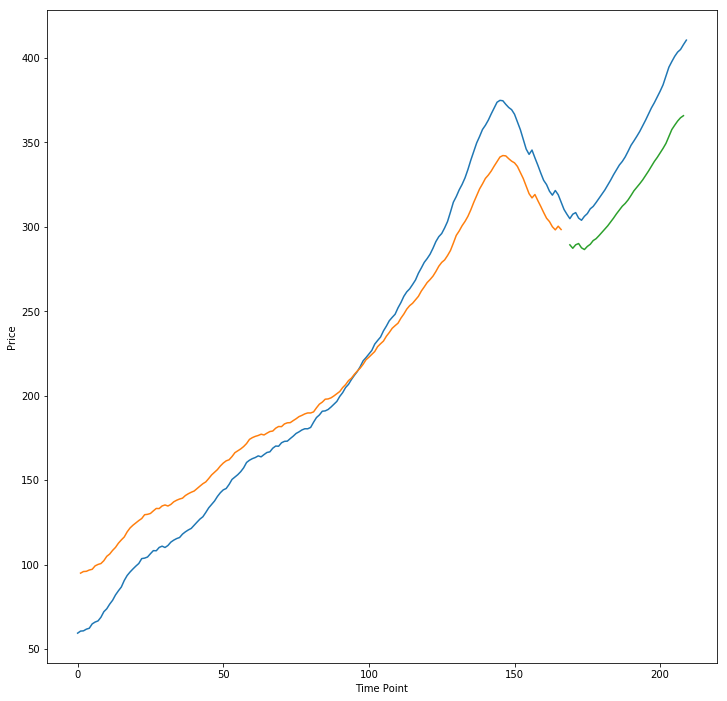



SVR Train Score: 20.62 RMSE
SVR Test Score: 30.14 RMSE


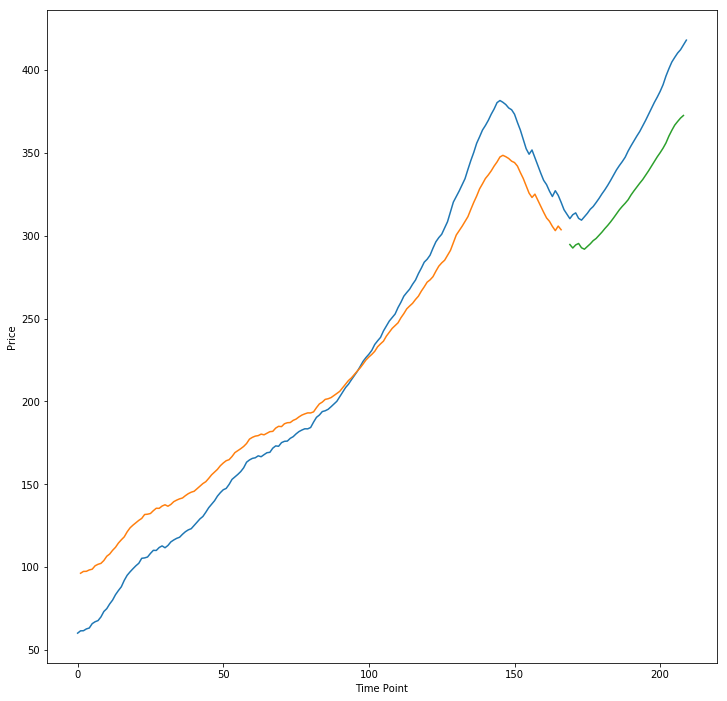



householditems
SVR Train Score: 4.09 RMSE
SVR Test Score: 6.66 RMSE


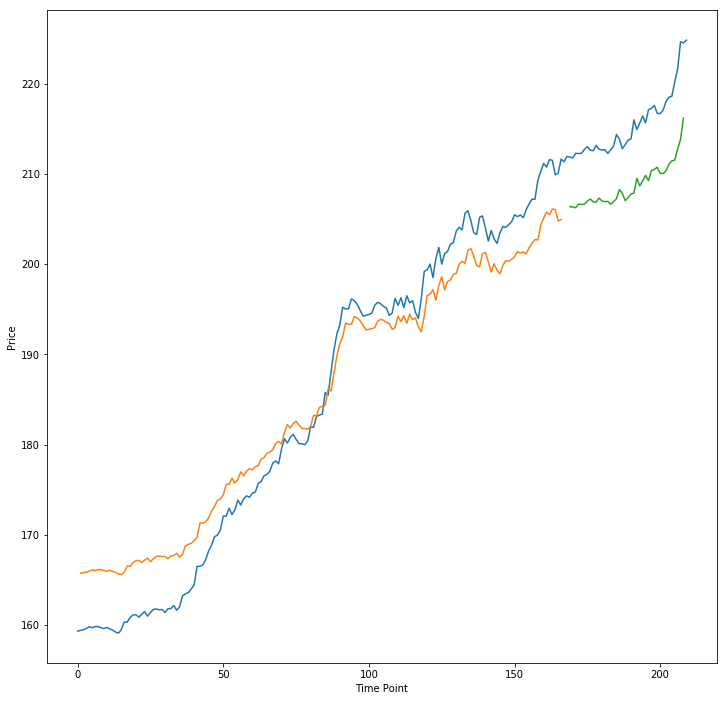



SVR Train Score: 4.16 RMSE
SVR Test Score: 6.84 RMSE


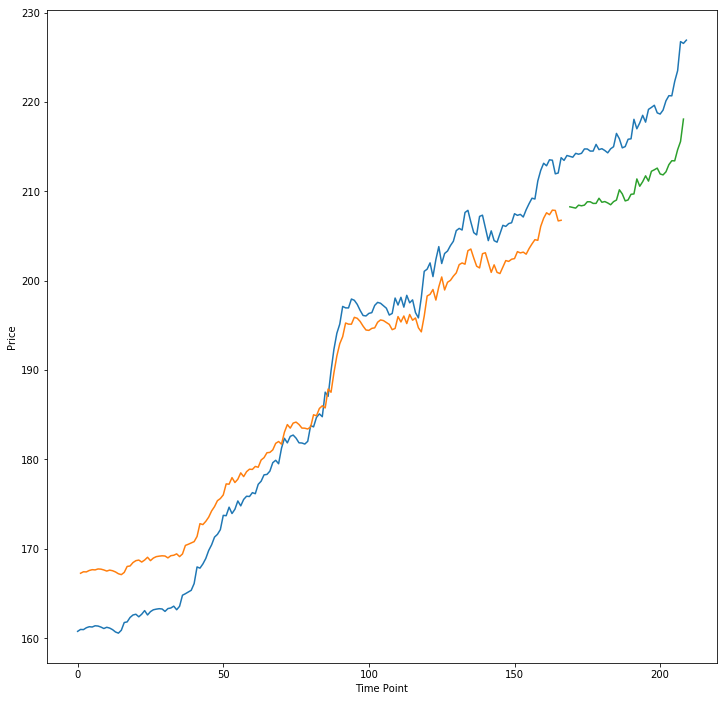



electronics
SVR Train Score: 2.26 RMSE
SVR Test Score: 4.70 RMSE


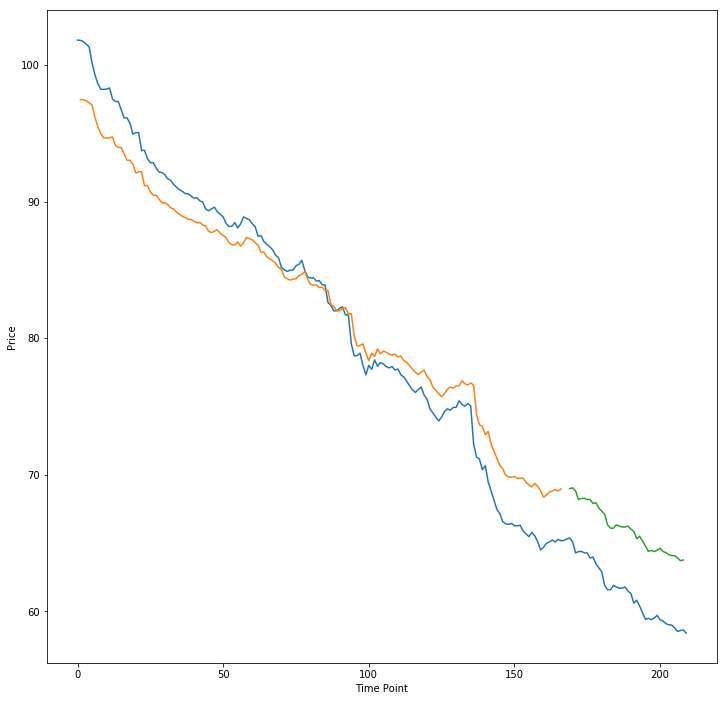



SVR Train Score: 2.31 RMSE
SVR Test Score: 4.75 RMSE


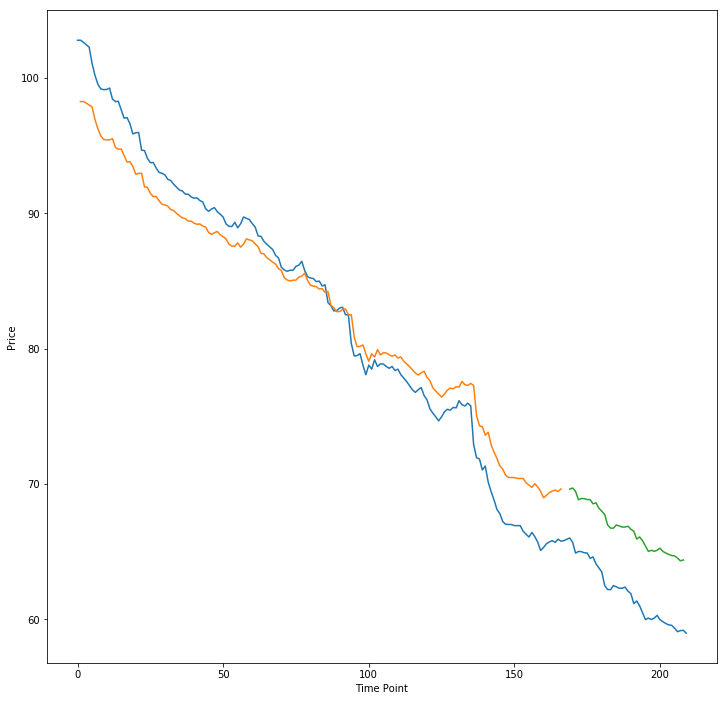



furniture
SVR Train Score: 3.66 RMSE
SVR Test Score: 7.67 RMSE


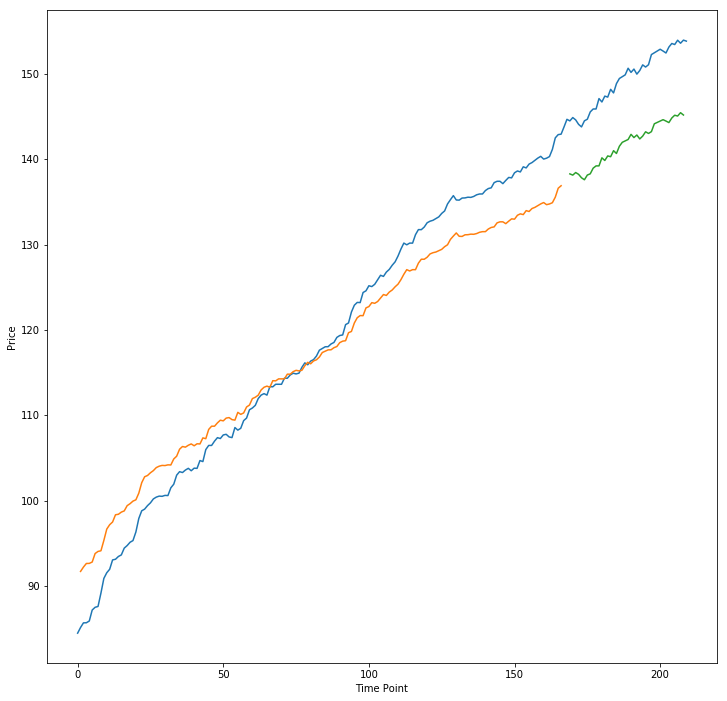



SVR Train Score: 3.69 RMSE
SVR Test Score: 7.74 RMSE


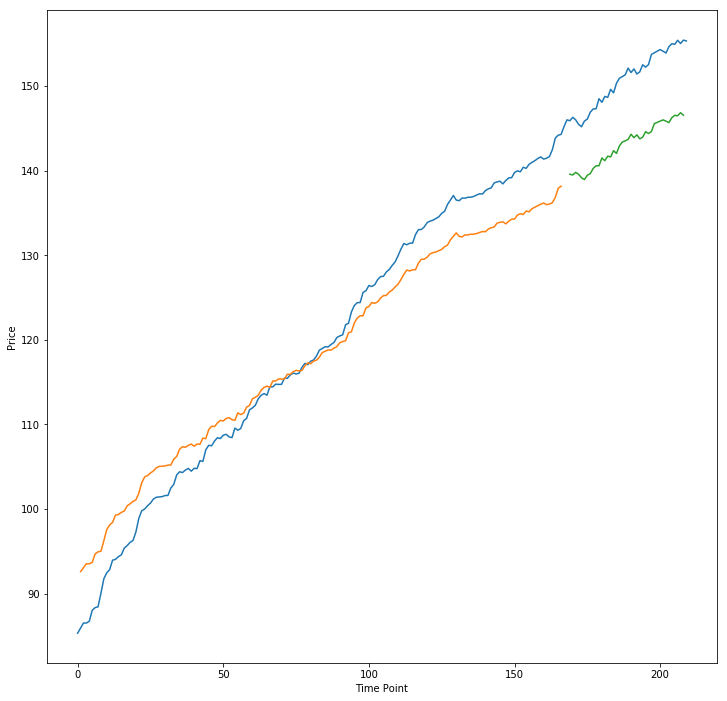



sportinggoods
SVR Train Score: 1.47 RMSE
SVR Test Score: 1.90 RMSE


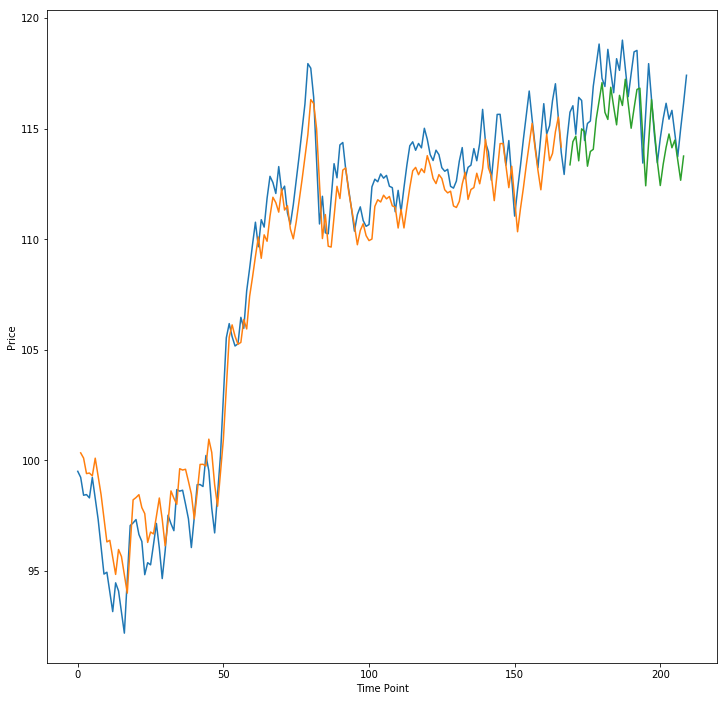



SVR Train Score: 1.47 RMSE
SVR Test Score: 1.89 RMSE


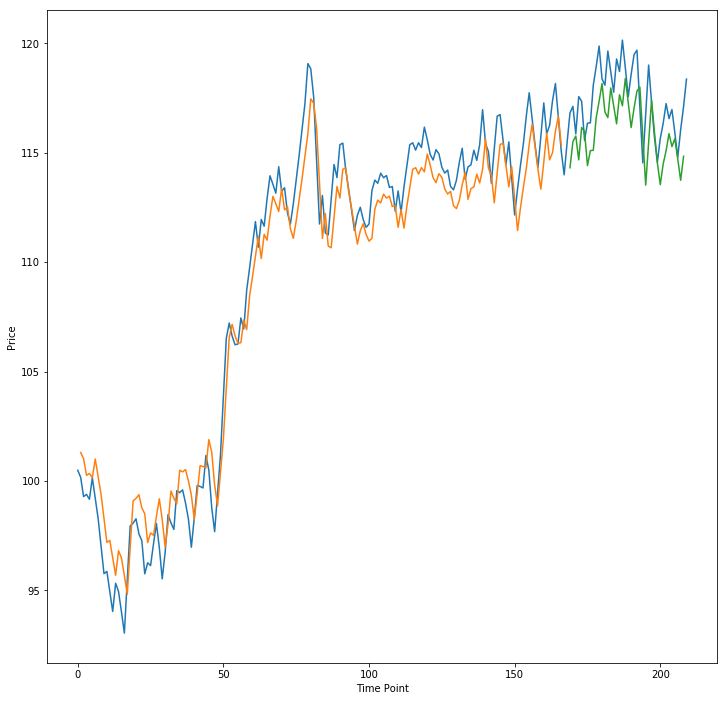



car & truck
SVR Train Score: 5.82 RMSE
SVR Test Score: 10.29 RMSE


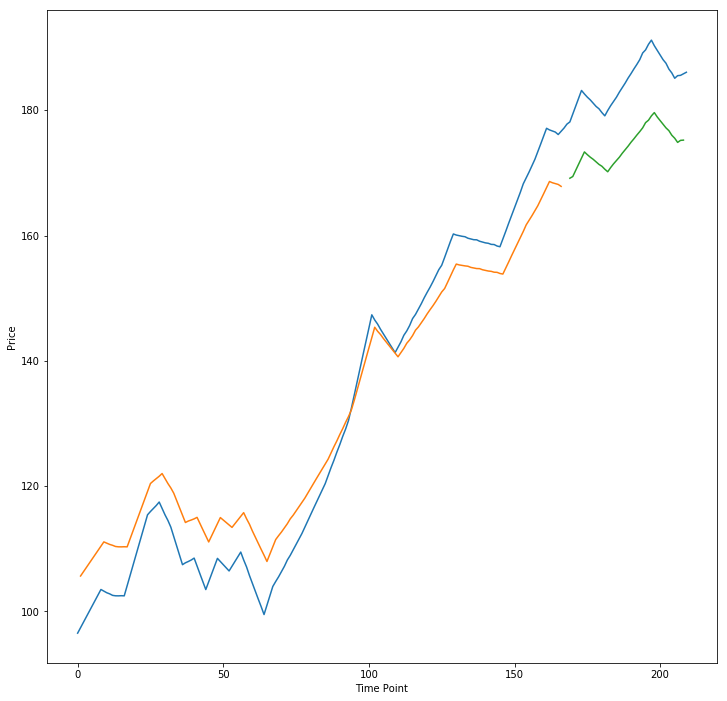



SVR Train Score: 5.84 RMSE
SVR Test Score: 10.25 RMSE


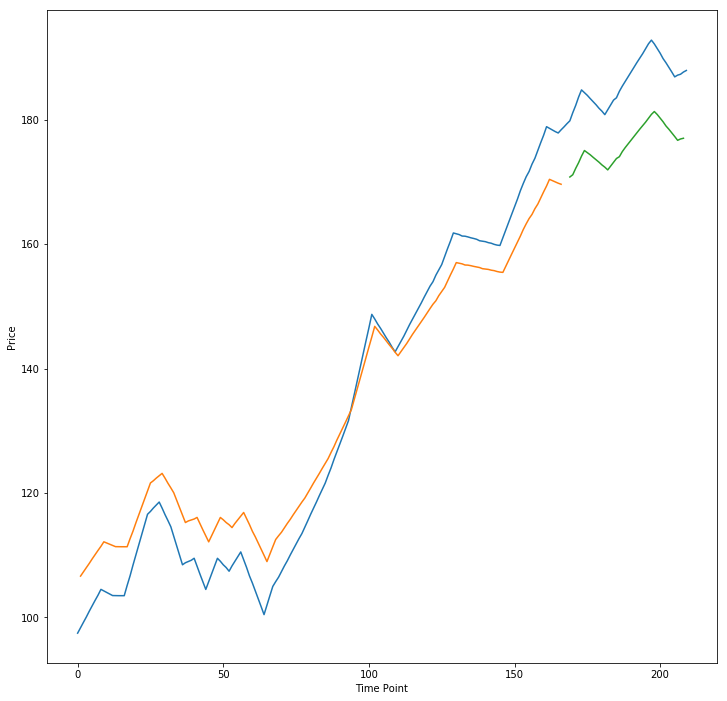



motorcycles/scooters
SVR Train Score: 80.57 RMSE
SVR Test Score: 88.85 RMSE


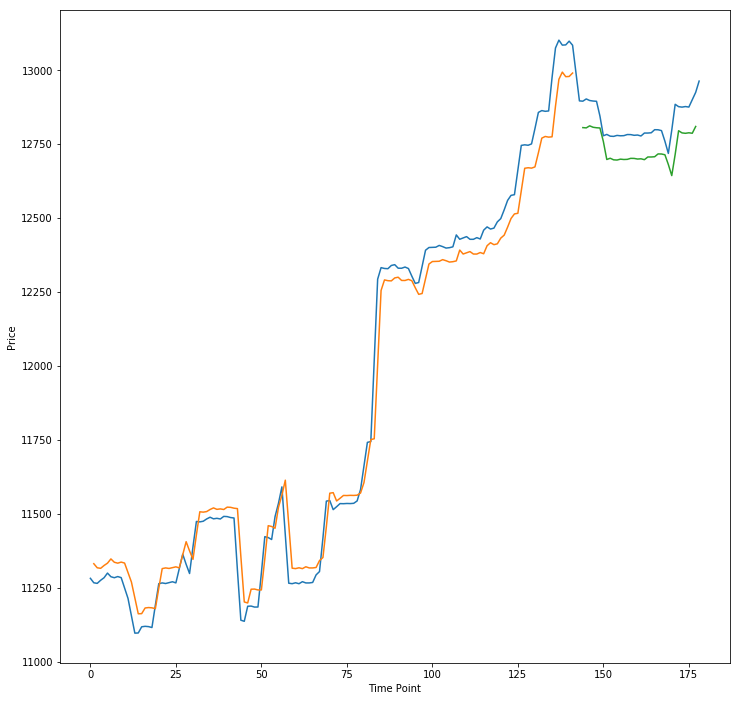



SVR Train Score: 79.75 RMSE
SVR Test Score: 81.00 RMSE


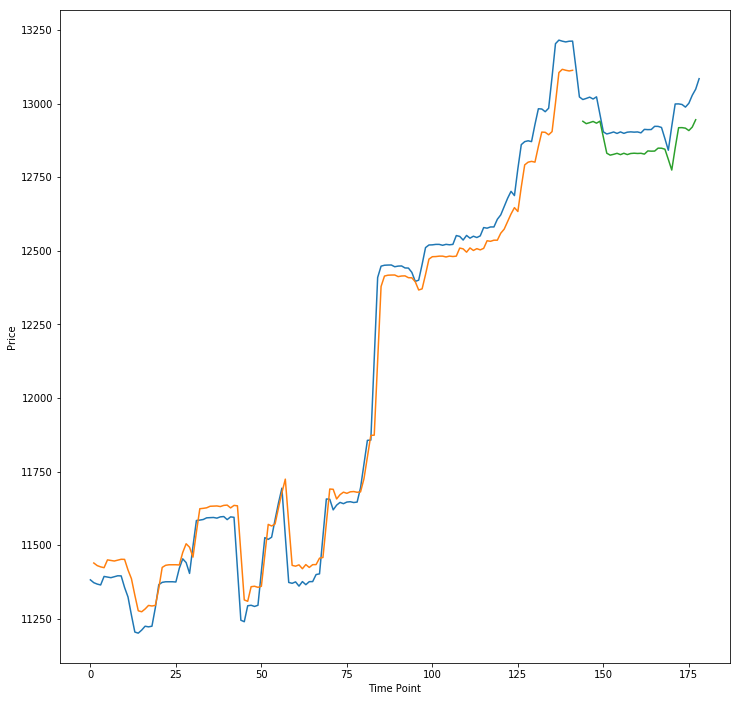



musicalinstruments
SVR Train Score: 2.10 RMSE
SVR Test Score: 4.25 RMSE


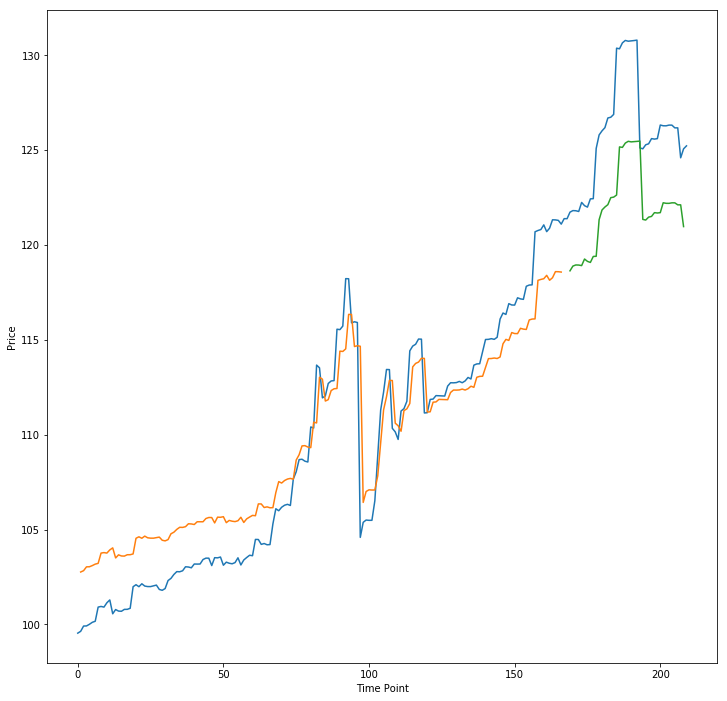



SVR Train Score: 2.10 RMSE
SVR Test Score: 4.18 RMSE


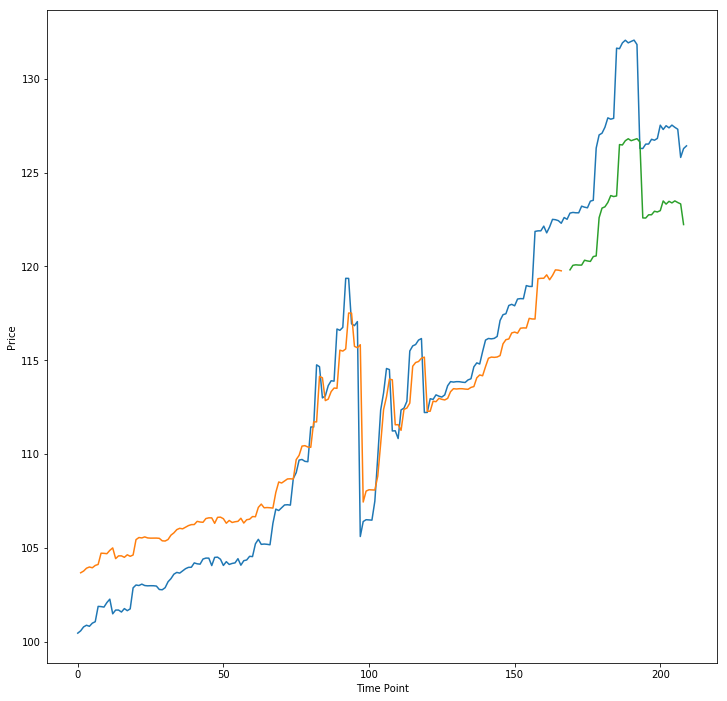



antiques
SVR Train Score: 1.29 RMSE
SVR Test Score: 1.81 RMSE


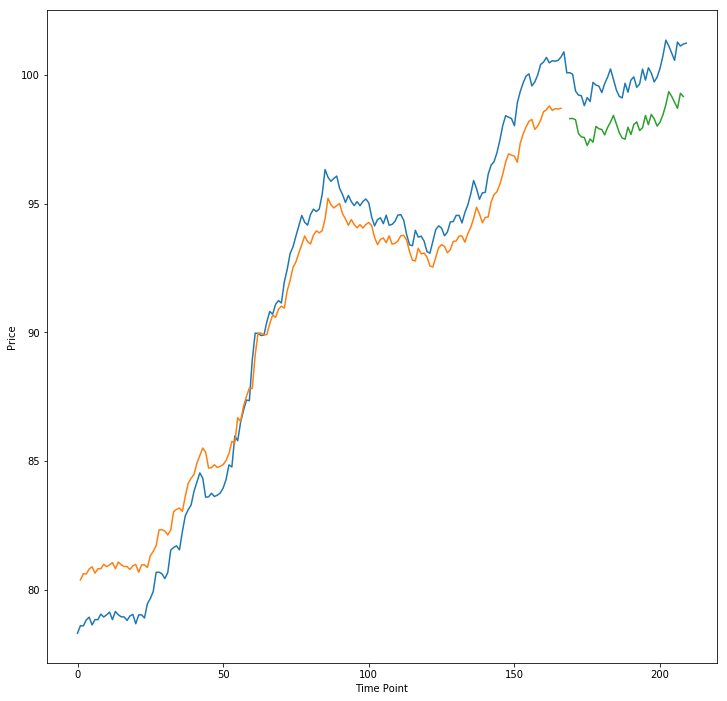



SVR Train Score: 1.33 RMSE
SVR Test Score: 1.84 RMSE


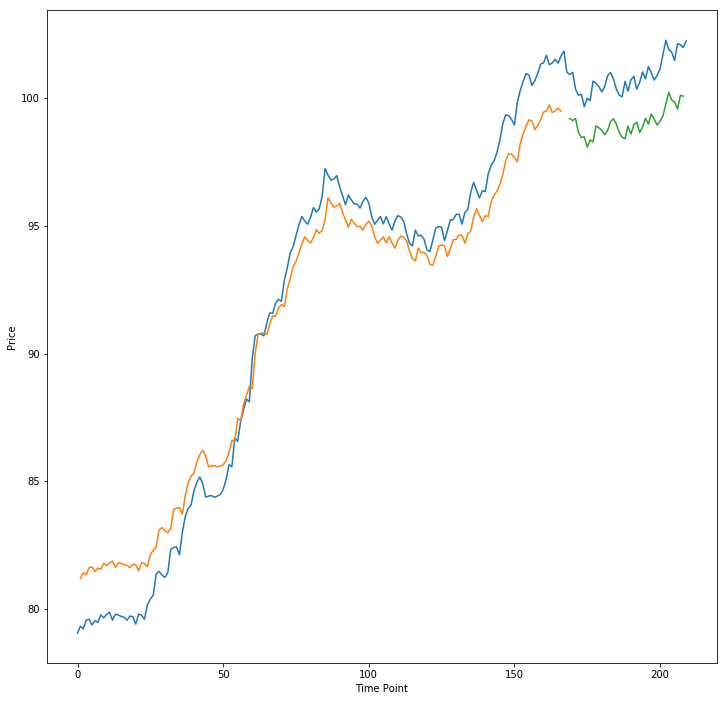



appliances
SVR Train Score: 4.38 RMSE
SVR Test Score: 16.87 RMSE


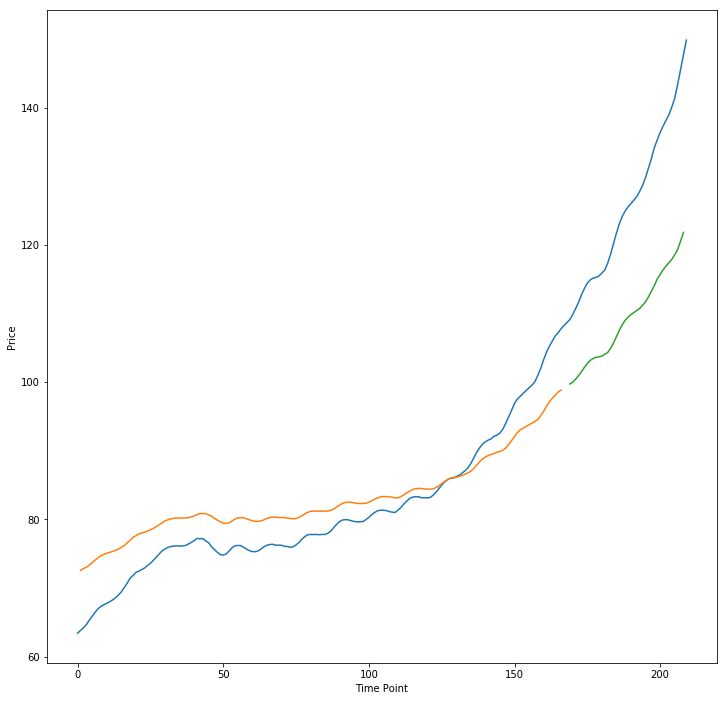



SVR Train Score: 4.41 RMSE
SVR Test Score: 16.83 RMSE


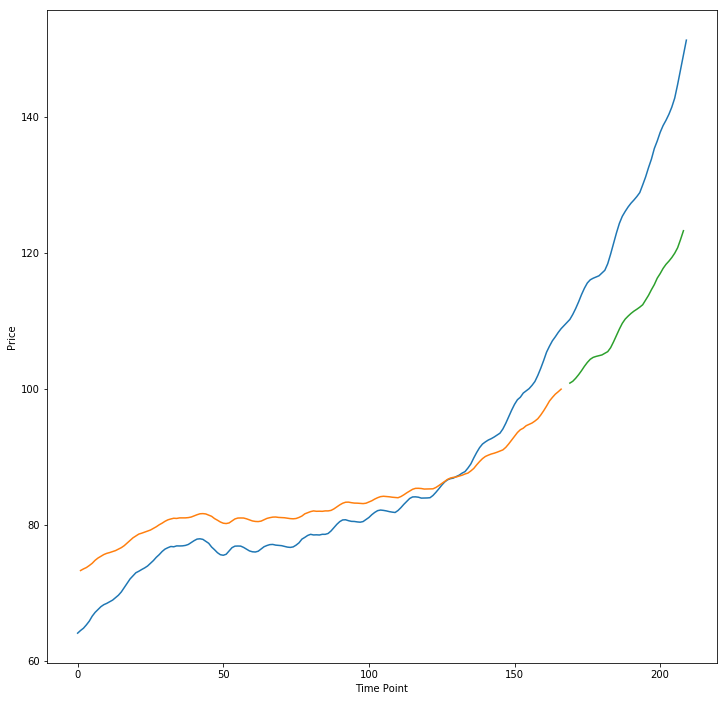



baby & kidstuff
SVR Train Score: 1.07 RMSE
SVR Test Score: 1.08 RMSE


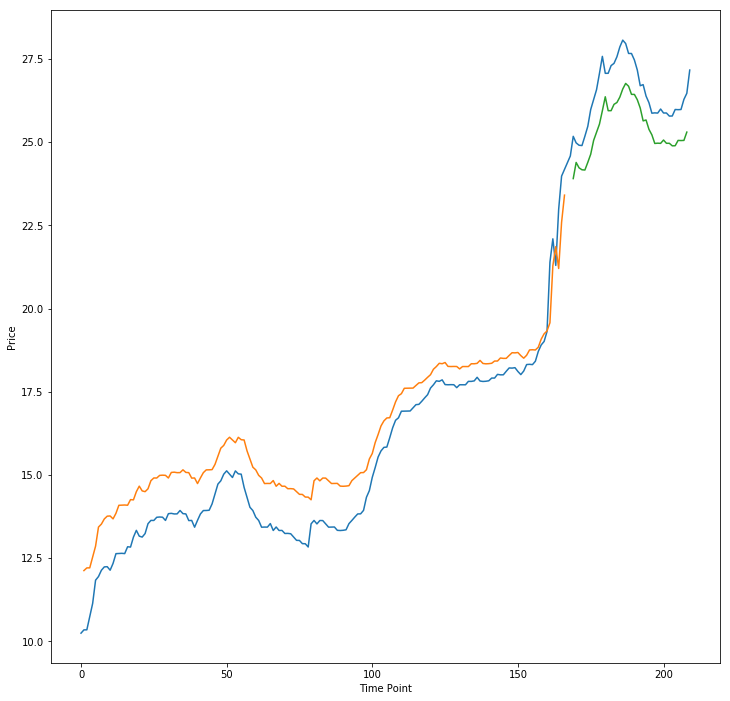



SVR Train Score: 1.09 RMSE
SVR Test Score: 1.10 RMSE


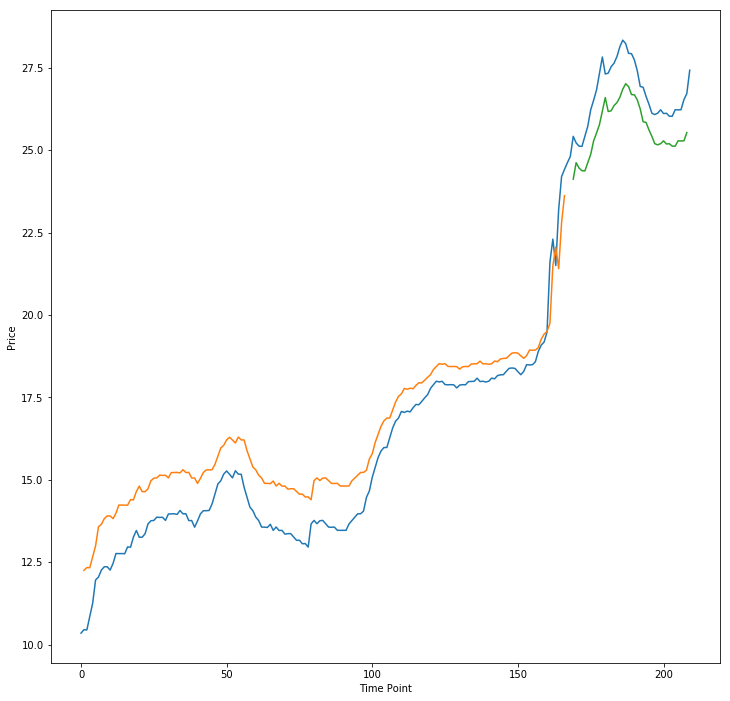



bicycles
SVR Train Score: 0.81 RMSE
SVR Test Score: 1.06 RMSE


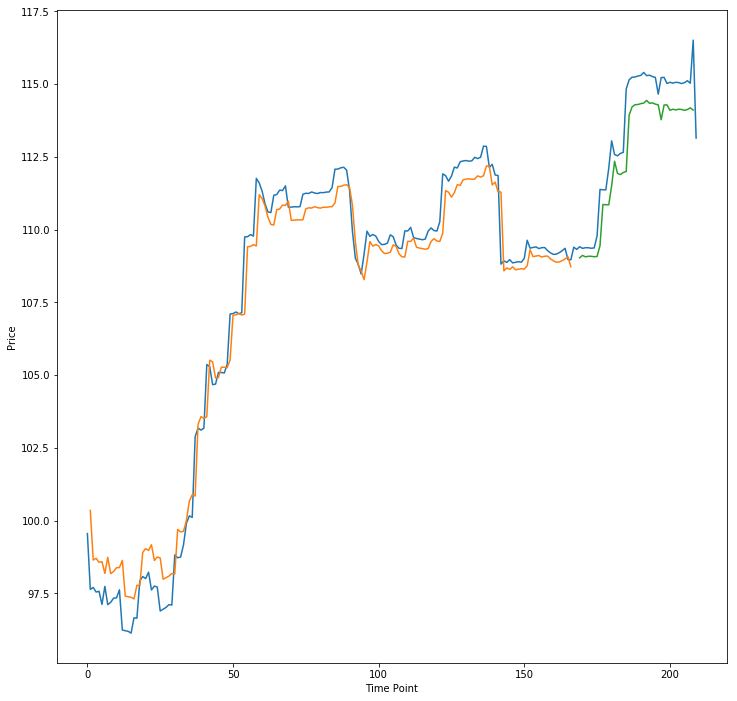



SVR Train Score: 0.85 RMSE
SVR Test Score: 1.12 RMSE


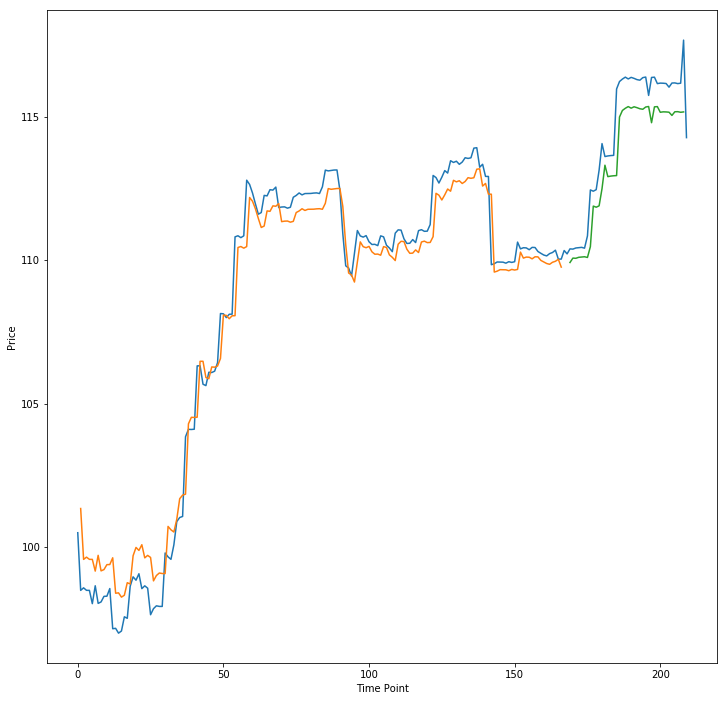



clothing & accessories
SVR Train Score: 2.94 RMSE
SVR Test Score: 6.71 RMSE


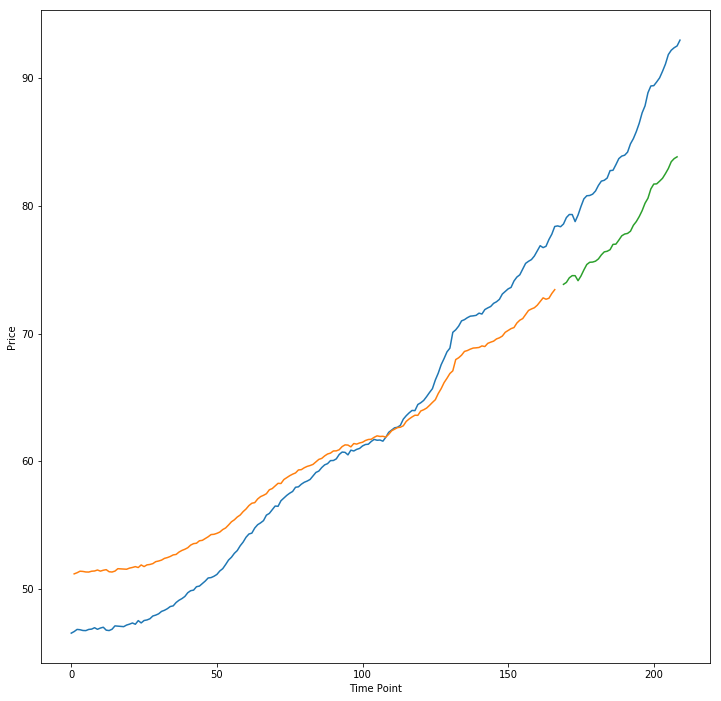



SVR Train Score: 3.02 RMSE
SVR Test Score: 6.85 RMSE


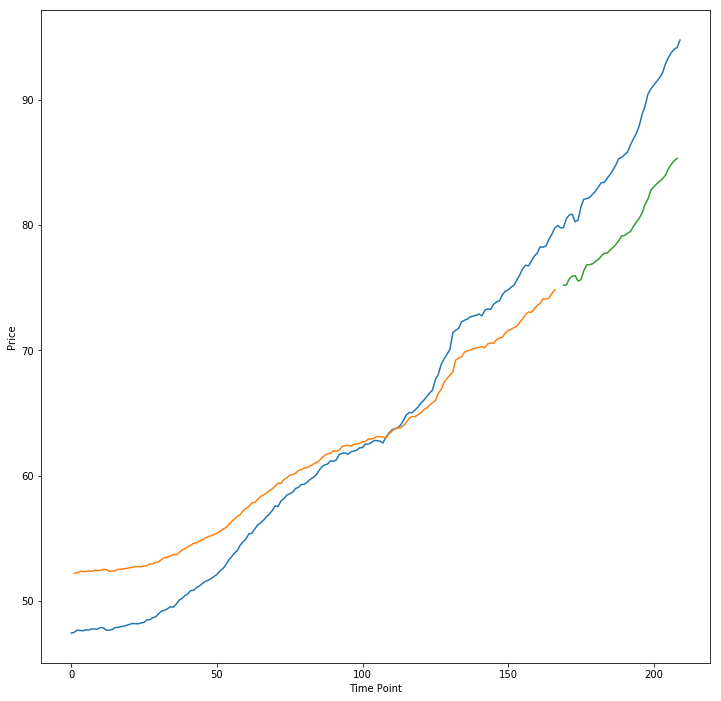



autoparts
SVR Train Score: 4.27 RMSE
SVR Test Score: 5.74 RMSE


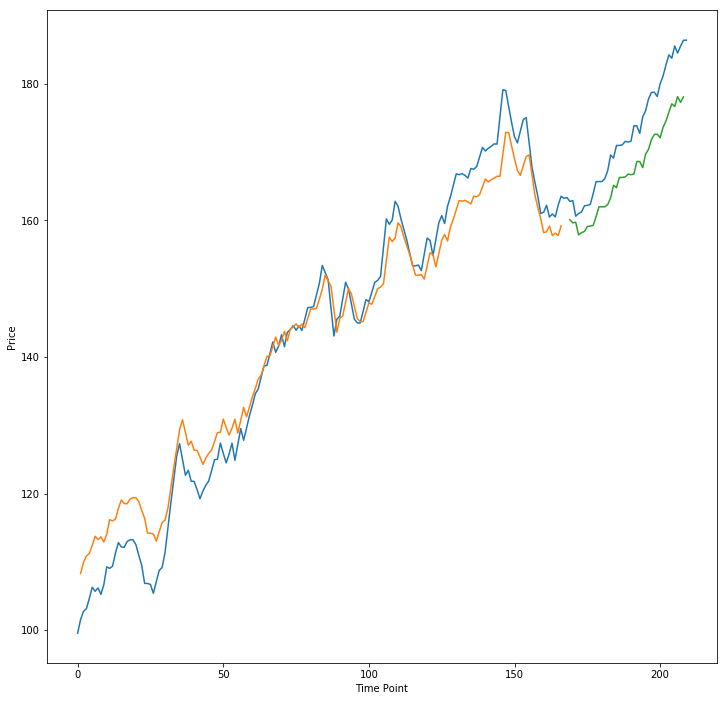



SVR Train Score: 4.33 RMSE
SVR Test Score: 5.77 RMSE


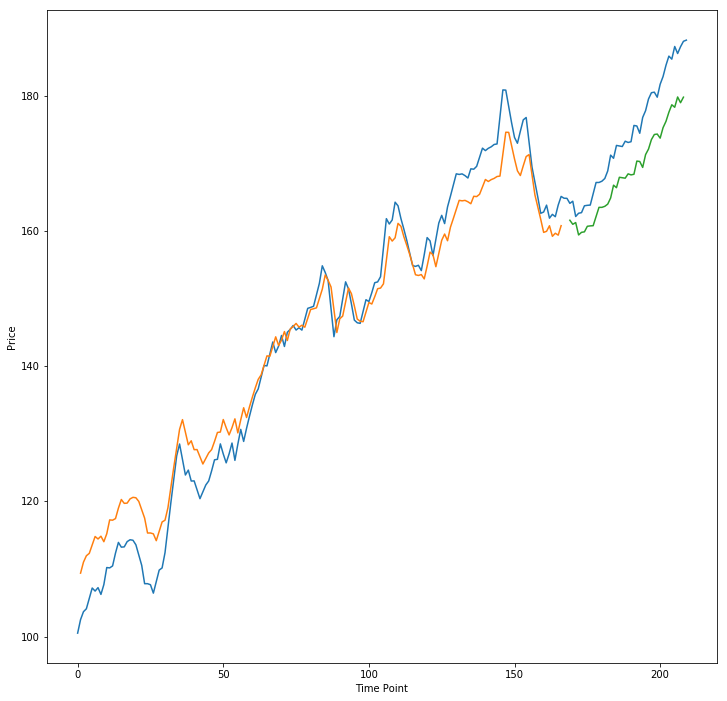



motorcycleparts & accessories
SVR Train Score: 52.71 RMSE
SVR Test Score: 221.52 RMSE


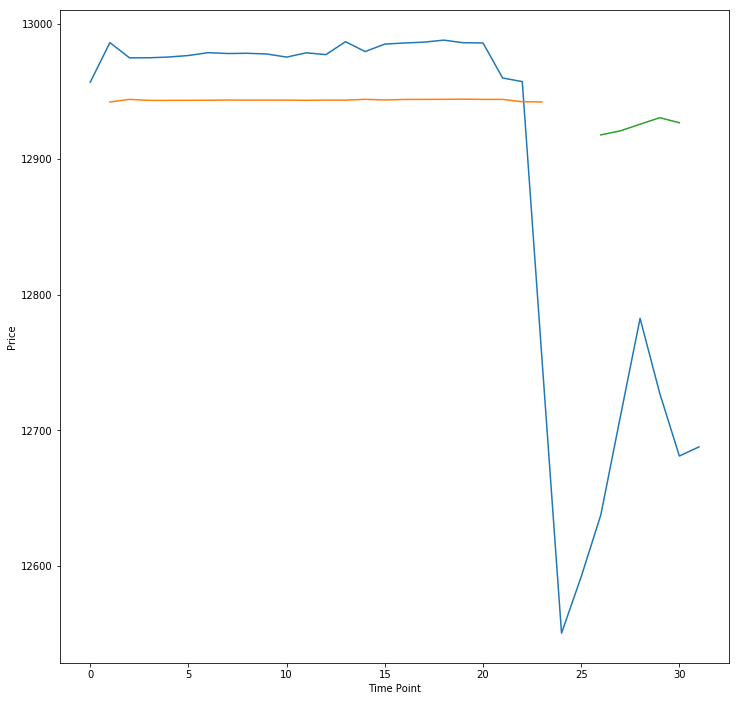



SVR Train Score: 51.67 RMSE
SVR Test Score: 223.94 RMSE


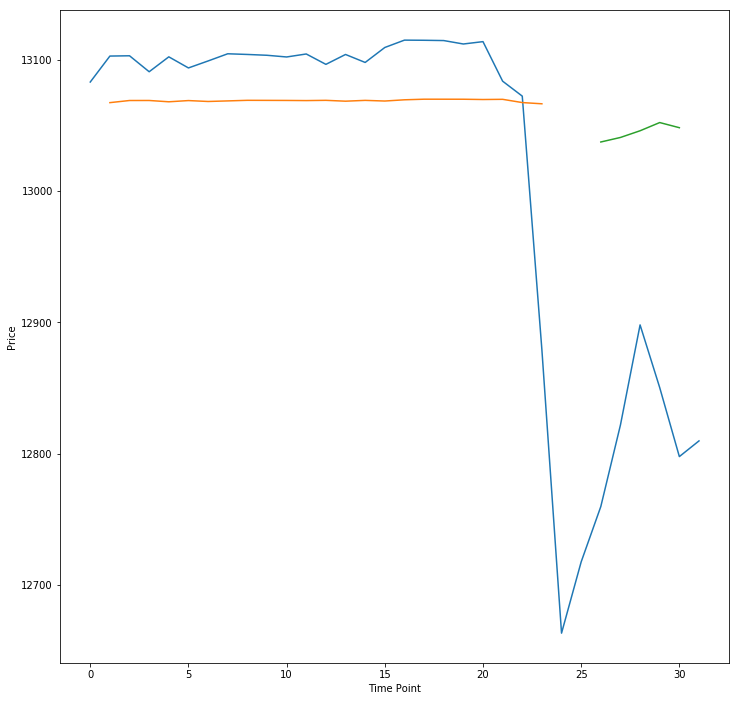

In [21]:
for pt in df.product_Type.unique():
    print('===================\n%s\n==================='%pt)
    single_pt_df = df[df['product_Type']==pt].groupby(['TimeSeries_Date']).agg({"TimeSeries_price":['min','max']})
    single_pt_df = single_pt_df.reset_index()
    single_pt_df.columns = ['time_point','min','max']
    single_pt_df['range'] = single_pt_df['max'] - single_pt_df['min']
    
    
    single_pt_df = single_pt_df.sort_values('time_point')
    single_pt_df.isnull().sum()
    single_pt_df.set_index('time_point')
    
    single_pt_df.index = pandas.to_datetime(single_pt_df['time_point'],unit='m')  

        
    cols_name = ['min','max','range']
    for col in cols_name[:2]:
        dataset = single_pt_df[col].values.astype('float32').reshape(-1,1)
        # normalize the dataset , to the range of 0-to-1
        scaler = MinMaxScaler(feature_range=(0, 1))
        dataset = scaler.fit_transform(dataset)
        #print(dataset[:10])
        train_size = int(len(dataset) * 0.8)
        train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
        #print((train).shape, len(test))
        
        verbose = 0
        show_plt = 1
        #print(len(trainX))
        #print(len(trainX[0]))
        support_vector_regression(train, test, look_back = 1,verbose= verbose, show_plt = show_plt)

        #logistic_regression(single_pt_df[col], look_back = 1,verbose= verbose, show_plt = show_plt)